<a href="https://colab.research.google.com/github/shreya139/Circuits-in-Stocks/blob/main/Circuit_algo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

7/3/2023

#WORKING ONLY FOR UPPER CIRCUIT AS OF NOW

In [1]:
pip install yfinance


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np

In [4]:
from pandas_datareader import data as pdr
import pandas as pd
import yfinance as yf
yf.pdr_override()

In [5]:
import yfinance as yf
import pandas as pd
from matplotlib import pyplot as plt
import missingno as mn
from pandas_datareader import data as pdr
import numpy as np

In [ ]:
from pandas_datareader import data as pdr

import yfinance as yf
yf.pdr_override() # <== that's all it takes :-)

# download dataframe
data = pdr.get_data_yahoo("SALASAR.NS", start="2023-01-01", end="2023-03-07",interval='1d')
data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-01-02,51.950001,54.250000,51.950001,53.849998,53.849998,2226997
2023-01-03,54.049999,55.250000,52.150002,52.799999,52.799999,1353288
2023-01-04,52.049999,53.349998,50.200001,50.500000,50.500000,2050914
2023-01-05,50.900002,51.500000,48.849998,49.900002,49.900002,595092
2023-01-06,50.000000,50.250000,48.099998,48.950001,48.950001,510870
2023-01-09,49.400002,51.349998,49.349998,51.299999,51.299999,1992490
2023-01-10,53.000000,53.200001,51.099998,51.500000,51.500000,2521453
2023-01-11,50.900002,51.650002,49.200001,50.200001,50.200001,1178944
2023-01-12,50.549999,52.400002,49.750000,51.750000,51.750000,1275542


In [ ]:
data = data.drop(['Adj Close'] , axis =1)

In [ ]:
a=np.zeros((len(data),1))
data['per_change'] = a

In [ ]:
data['Close'][3]

49.900001525878906

In [ ]:
for i in range(1,len(data)):
  data['per_change'][i] = ((data['Close'][i] - data['Close'][i-1] )/(data['Close'][i-1]))*100 

<ipython-input-61-6dd92d747872>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['per_change'][i] = ((data['Close'][i] - data['Close'][i-1] )/(data['Close'][i-1]))*100


In [ ]:
data

,Open,High,Low,Close,Volume,per_change
Date,,,,,,
2023-01-02,51.950001,54.250000,51.950001,53.849998,2226997,0.000000
2023-01-03,54.049999,55.250000,52.150002,52.799999,1353288,-1.949859
2023-01-04,52.049999,53.349998,50.200001,50.500000,2050914,-4.356059
2023-01-05,50.900002,51.500000,48.849998,49.900002,595092,-1.188116
2023-01-06,50.000000,50.250000,48.099998,48.950001,510870,-1.903809
2023-01-09,49.400002,51.349998,49.349998,51.299999,1992490,4.800814
2023-01-10,53.000000,53.200001,51.099998,51.500000,2521453,0.389865
2023-01-11,50.900002,51.650002,49.200001,50.200001,1178944,-2.524270
2023-01-12,50.549999,52.400002,49.750000,51.750000,1275542,3.087648


In [ ]:
data['high_min_preclose%'] =a  # a is zero matrix
#Calculating percentage of Day high - previous day close
for i in range(1,len(data)):
  data['high_min_preclose%'][i] = ((data['High'][i] - data['Close'][i-1] )/(data['Close'][i-1]))*100 
data

<ipython-input-63-1d2e7aa25dac>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['high_min_preclose%'][i] = ((data['High'][i] - data['Close'][i-1] )/(data['Close'][i-1]))*100


,Open,High,Low,Close,Volume,per_change,high_min_preclose%
Date,,,,,,,
2023-01-02,51.950001,54.250000,51.950001,53.849998,2226997,0.000000,0.000000
2023-01-03,54.049999,55.250000,52.150002,52.799999,1353288,-1.949859,2.599817
2023-01-04,52.049999,53.349998,50.200001,50.500000,2050914,-4.356059,1.041665
2023-01-05,50.900002,51.500000,48.849998,49.900002,595092,-1.188116,1.980198
2023-01-06,50.000000,50.250000,48.099998,48.950001,510870,-1.903809,0.701400
2023-01-09,49.400002,51.349998,49.349998,51.299999,1992490,4.800814,4.902957
2023-01-10,53.000000,53.200001,51.099998,51.500000,2521453,0.389865,3.703707
2023-01-11,50.900002,51.650002,49.200001,50.200001,1178944,-2.524270,0.291265
2023-01-12,50.549999,52.400002,49.750000,51.750000,1275542,3.087648,4.382472


#DATE - 4/4/2023

#CHECKING ALGO IN OTHER STOCKS



#STOCKS FOR CHECKING - SALASAR ,ASIANENE , OBCL , KECL, TEMBO , ADANITRANS, ADANIPOWER , ADANIGREEN


#

In [2]:
import datetime

In [6]:
#Change company name and run this after this change company name in circuit checker after that run find_circuit(Min_data)
yf.pdr_override()
Min_data = pdr.get_data_yahoo('ADANIGREEN.NS', start='2023-03-01', end='2023-04-01',interval="1d")
Min_data

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-03-01,509.000000,509.549988,501.899994,509.549988,509.549988,387360
2023-03-02,535.000000,535.000000,535.000000,535.000000,535.000000,206751
2023-03-03,561.750000,561.750000,561.750000,561.750000,561.750000,58629
2023-03-06,589.799988,589.799988,589.799988,589.799988,589.799988,155806
2023-03-08,619.250000,619.250000,619.250000,619.250000,619.250000,133344
2023-03-09,650.200012,650.200012,650.200012,650.200012,650.200012,784131
2023-03-10,675.000000,682.700012,663.250000,682.700012,682.700012,2561407
2023-03-13,716.799988,716.799988,716.799988,716.799988,716.799988,854810
2023-03-14,714.000000,729.299988,681.000000,706.099976,706.099976,9935463


In [7]:
def circuit_status(data):
  if data['Open'] == data['Close'] == data['High'] == data['Low']:
    return 1
  else:
    return 0

In [8]:
import datetime
def circuit_checker(dates):
  c_data = pdr.get_data_yahoo('ADANIGREEN.NS', start=dates, end = dates + datetime.timedelta(days=1),interval='15m')
  c_data = c_data.assign(circuit=c_data.apply(circuit_status, axis=1))
  if c_data.circuit.sum():
    return 1
  else:
    return 0

In [18]:
def find_circuits(data):
  # adding a column which show the maximum change of price in that day.
  a=np.zeros((len(data),1)) 
  a[0] = ((data['High'][0] - data['Open'][0] )/(data['Close'][0]))*100
  for i in range(1,len(data)):
    a[i] = ((data['High'][i] - data['Close'][i-1] )/(data['Close'][i-1]))*100 
  data['high_preclose%'] = a
  # print(data)

  # adding a column to set which show if circuit is there or not
  data['possible_circuit'] = np.where(data['high_preclose%'] >= 4.5, 1, 0)
  # for date in data.query('possible_circuit == 1').index:
  for i in range(len(data)):
    if data['possible_circuit'][i] == 1:
      a[i] = circuit_checker(data.index[i])
    else:
      a[i] = 0
  data['circuit'] = a

  # printing Dates when the circuit has happened
  print('Dates on which there is circuits')
  for date in data.query('circuit == 1').index:
    print('--->',date)
  
  plt.figure(figsize=(13,3))
  plt.plot(data['Close'])
  plt.scatter(data.query('possible_circuit == 1').index, data.query('possible_circuit == 1')['Close'], color='Red')
  plt.scatter(data.query('circuit == 1').index, data.query('circuit == 1')['Close'], color='Green')
  plt.show()

  return data

                   Open         High         Low        Close    Adj Close  \
Date                                                                         
2023-03-01   509.000000   509.549988  501.899994   509.549988   509.549988   
2023-03-02   535.000000   535.000000  535.000000   535.000000   535.000000   
2023-03-03   561.750000   561.750000  561.750000   561.750000   561.750000   
2023-03-06   589.799988   589.799988  589.799988   589.799988   589.799988   
2023-03-08   619.250000   619.250000  619.250000   619.250000   619.250000   
2023-03-09   650.200012   650.200012  650.200012   650.200012   650.200012   
2023-03-10   675.000000   682.700012  663.250000   682.700012   682.700012   
2023-03-13   716.799988   716.799988  716.799988   716.799988   716.799988   
2023-03-14   714.000000   729.299988  681.000000   706.099976   706.099976   
2023-03-15   725.000000   741.400024  716.849976   740.400024   740.400024   
2023-03-16   766.150024   777.400024  755.000000   777.400024   

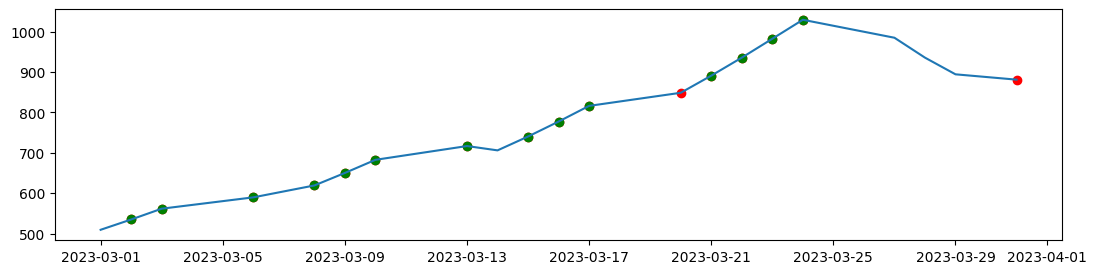

In [19]:
data = find_circuits(Min_data)